In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
print(data.head())

   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

**No missing values found**

In [4]:
data.isnull()
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(data['Average_Temperature_C'].min(), data['Average_Temperature_C'].max()))
data['Scaled_Precipitation'] = scaler.fit_transform(data[['Total_Precipitation_mm']])


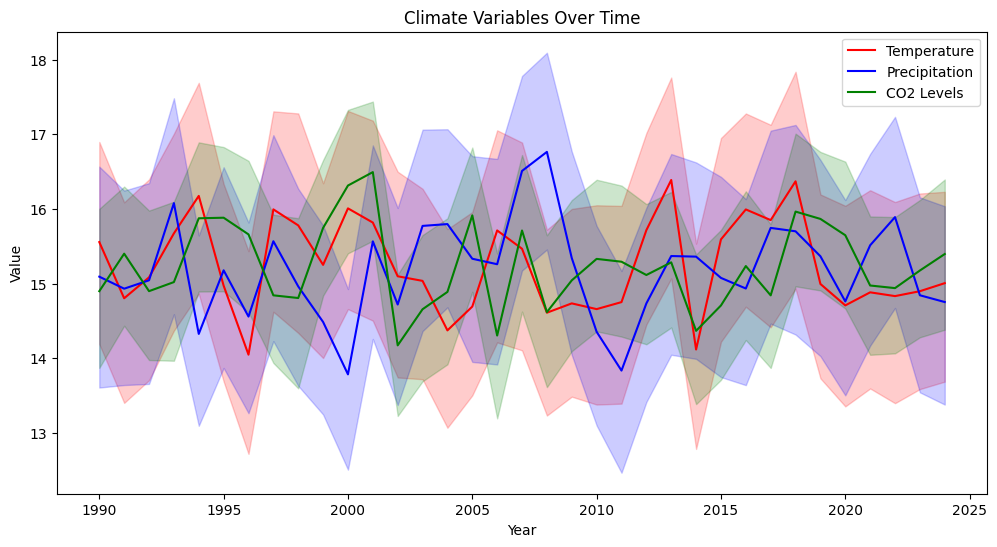

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['Year'], y=data['Average_Temperature_C'], label='Temperature', color='r')
sns.lineplot(x=data['Year'], y=data['Scaled_Precipitation'], label='Precipitation', color='b')
sns.lineplot(x=data['Year'], y=data['CO2_Emissions_MT'], label='CO2 Levels', color='g')
plt.title('Climate Variables Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

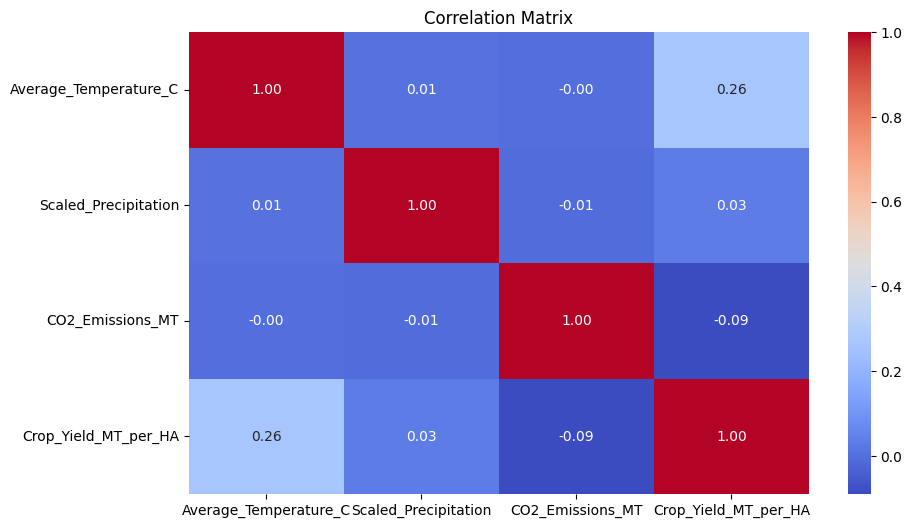

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Average_Temperature_C', 'Scaled_Precipitation', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Define features (temperature, scaled precipitation, CO2) and target (crop yield)
X = data[['Average_Temperature_C', 'Scaled_Precipitation', 'CO2_Emissions_MT']]
y = data['Crop_Yield_MT_per_HA']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make Predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.983766402541189


In [16]:
future_data = pd.DataFrame({
    'Average_Temperature_C': [1.2, 1.5, 2.0],  # Future temperature increases
    'Scaled_Precipitation': [5, -3, 2],  # Changes in precipitation
    'CO2_Emissions_MT': [420, 450, 480]  # Rising CO2 levels
})
future_yields = model.predict(future_data)
print('Predicted Future Yields:', future_yields)


Predicted Future Yields: [-2.01321843 -2.31772725 -2.58026755]


**Actual vs. Predicted Crop Yields (Scatter Plot)**

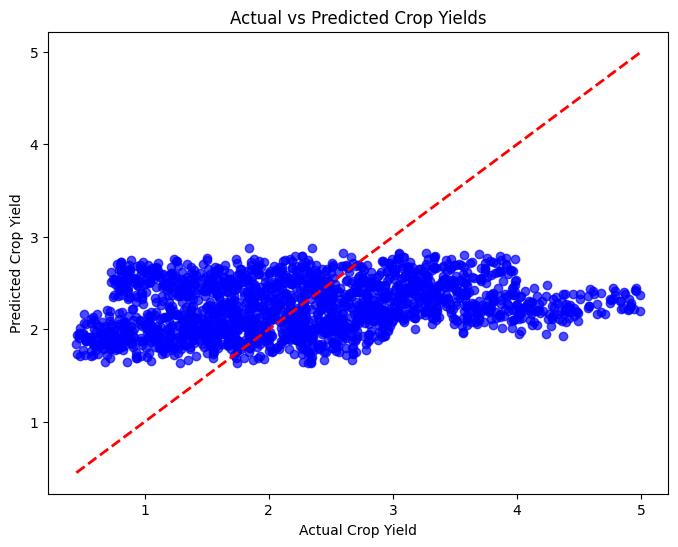

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yields")
plt.show()


**Residual Plot (Error Analysis)**

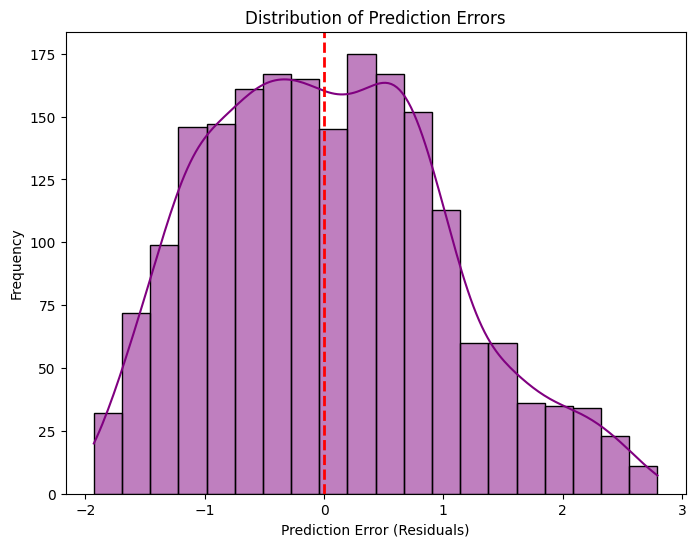

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


**Feature Importance (For Random Forest)**

Random Forest Mean Squared Error: 0.7991728422515


<ipython-input-20-d84cbc131600>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


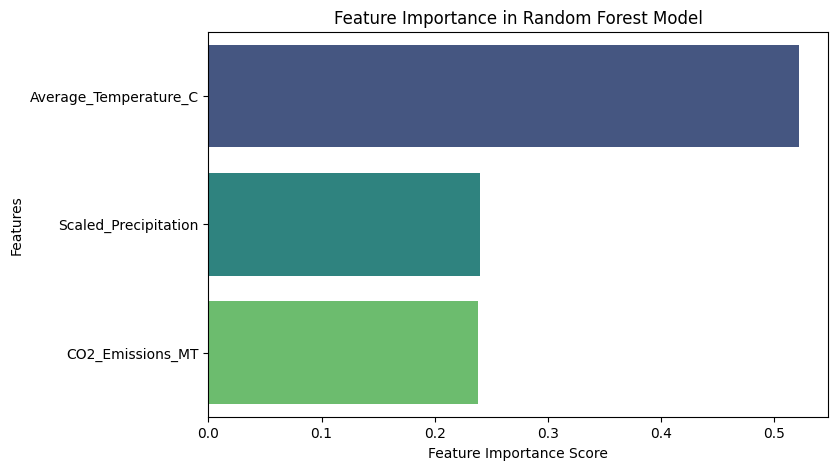

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Feature importance visualization
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()